# Pymaceuticals Inc.
---

### Analysis
- There exists a strong positive linear correltion between mouse weight and tumor volume (.88)
- Ramicane had the lowest mean tumor volume of 40.21
- Of the 4 treatments that were examined further , Infubinol contained 1 outlier when looking at final tumor volume

 

In [131]:
# Dependencies and Setup
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_combined = pd.merge(mouse_metadata, study_results, on="Mouse ID")# mouse_combined = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
# Display the data table for preview
mouse_combined.head

<bound method NDFrame.head of      Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898   

In [132]:
# Checking the number of mice.
total_mice = (mouse_combined["Mouse ID"]).value_counts()
print(len(total_mice))

249


In [133]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_mouse_df = mouse_combined.loc[mouse_combined.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
dupe_mouse_df

array(['g989'], dtype=object)

In [150]:
# Optional: Get all the data for the duplicate mouse ID.
dupe_mouse_all = mouse_combined.loc[mouse_combined['Mouse ID'] == 'g989']
dupe_mouse_all

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [151]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_df = mouse_combined[mouse_combined['Mouse ID'].isin(dupe_mouse_df) == False]
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [136]:
# Checking the number of mice in the clean DataFrame.

cleaned_df['Mouse ID'].nunique()

248

## Summary Statistics

In [137]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean_tumor = cleaned_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median_tumor = cleaned_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance_tumor = cleaned_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
std_tumor = cleaned_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
ster_tumor = cleaned_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

groupby_data = pd.DataFrame({"Mean Tumor":mean_tumor,
 "Median Tumor":median_tumor,
 "Variance Tumor":variance_tumor,
 "Standard Deviation":std_tumor,
 "Standard Error":ster_tumor}) 
groupby_data

,Mean Tumor,Median Tumor,Variance Tumor,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [138]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

agg_data = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
agg_data

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

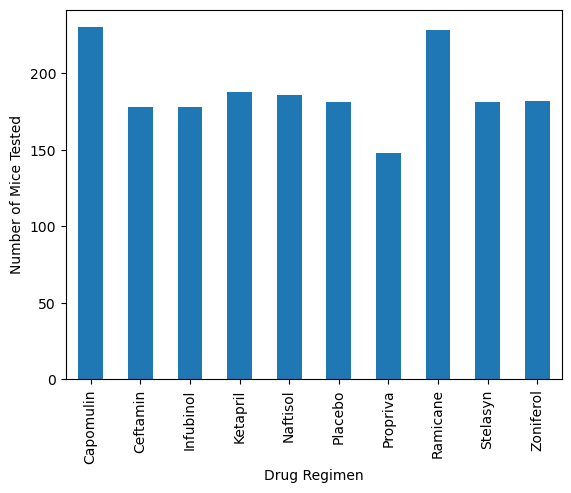

In [139]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

cleaned_df.groupby('Drug Regimen')['Timepoint'].count().plot(kind='bar',ylabel="Number of Mice Tested",legend=False)


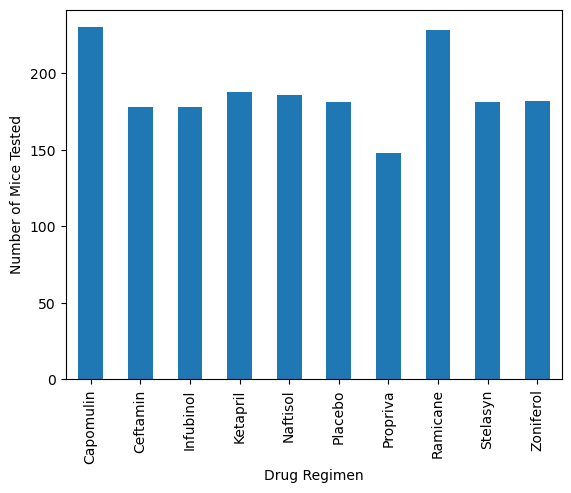

In [140]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
var = cleaned_df.groupby('Drug Regimen')['Timepoint'].count()
mat_bar = var.plot.bar(ylabel='Number of Mice Tested')
plt.show()


<AxesSubplot:ylabel='Sex'>

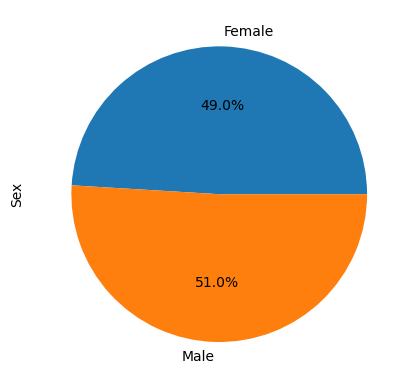

In [141]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

cleaned_df.groupby('Sex')['Sex'].count().plot(kind='pie',ylabel="Sex",autopct='%1.1f%%')

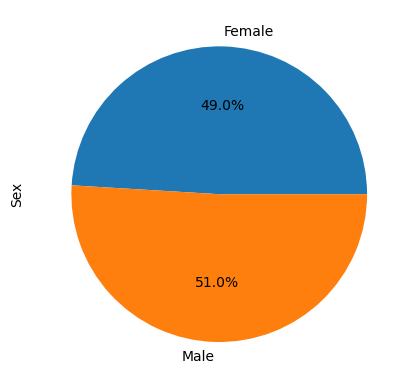

In [142]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
var = cleaned_df.groupby('Sex')['Sex'].count()
mat_pie = var.plot.pie(ylabel='Sex',autopct='%1.1f%%')
plt.show()


## Quartiles, Outliers and Boxplots

In [143]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

# max_timepoint creates a variable that gets the last timepoint for each mouse
max_timepoint = cleaned_df.groupby('Mouse ID')['Timepoint'].max()
max_timepoint = max_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
timepoint_merged = max_timepoint.merge(cleaned_df, on = ["Mouse ID", "Timepoint"], how = "left")
timepoint_merged

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [144]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

treat_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_value = [ ]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treat_list:
     # Locate the rows which contain mice on each drug and get the tumor volumes
    loc_tumor = timepoint_merged.loc[timepoint_merged['Drug Regimen']== treatment,'Tumor Volume (mm3)']
    # add subset 
    tumor_value.append(loc_tumor)
    # Determine outliers using upper and lower bounds
    quartiles = loc_tumor.quantile([.25,.50,.75])
    upper_lim = quartiles[.75]
    low_lim = quartiles[.25]
    IQR = upper_lim - low_lim
    up_bounds = upper_lim+(1.5*IQR)
    low_bounds = low_lim-(1.5*IQR)
    outliers = loc_tumor.loc[(loc_tumor<low_bounds)|(loc_tumor>up_bounds)]
    print(treatment, outliers)

Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


{'whiskers': [<matplotlib.lines.Line2D at 0x7f8508e53580>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8508e46a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8508e46280>,
 'medians': [<matplotlib.lines.Line2D at 0x7f8508e40460>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8508e40c40>,
 'means': []}

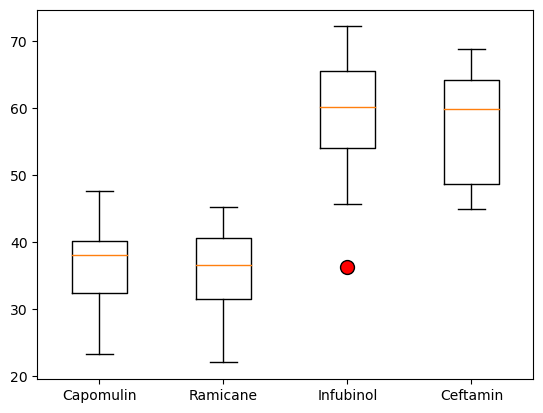

In [145]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

dot_color = dict(markerfacecolor="red", markersize= 10)
plt.boxplot(tumor_value, labels = treat_list, flierprops = dot_color)

## Line and Scatter Plots

<AxesSubplot:title={'center':'Capomulin treatment of mouse m601'}, xlabel='Timepoint (Days)', ylabel='Tumor Volume (mm3)'>

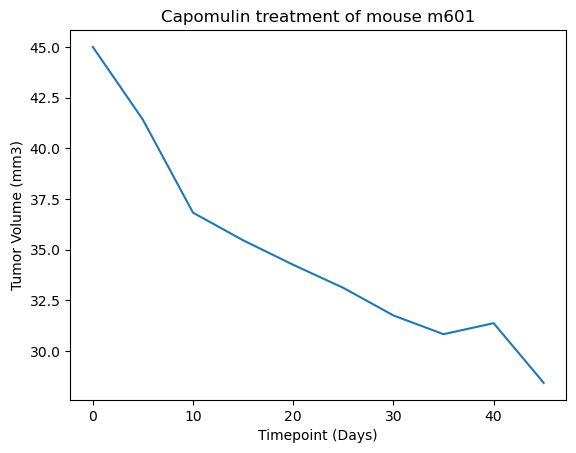

In [146]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

cap_mouse_df = cleaned_df.loc[cleaned_df["Mouse ID"] == "m601"]
cap_mouse_df.plot.line(x='Timepoint', y='Tumor Volume (mm3)',legend=False,ylabel = ('Tumor Volume (mm3)'),xlabel = ('Timepoint (Days)'),title = ('Capomulin treatment of mouse m601'))

<AxesSubplot:title={'center':'Tumor volume vs. weight in Capomulin treatment'}, xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

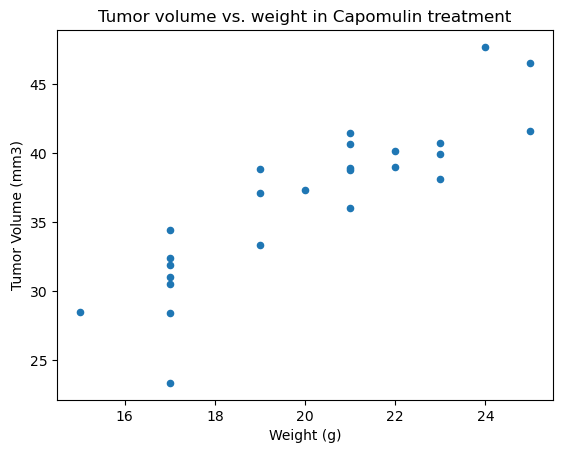

In [147]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin = timepoint_merged.loc[timepoint_merged["Drug Regimen"]== "Capomulin"]
capomulin.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)',legend=False,ylabel = ('Tumor Volume (mm3)'),xlabel = ('Weight (g)'),title = ('Tumor volume vs. weight in Capomulin treatment'))

## Correlation and Regression

In [148]:
# Calculate the correlation coefficient(r value) and linear regression model (Y = a+bx)
                                                                        # b = slope, a= yint
cap_merged = timepoint_merged.loc[timepoint_merged["Drug Regimen"] == "Capomulin"]
cap_avg = cap_merged
cap_avg_mean = cap_merged.groupby(['Mouse ID']).mean()
                                                                        
x=cap_avg[('Weight (g)')]
y =cap_avg[('Tumor Volume (mm3)')]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
corr = st.pearsonr(x,y)

print(f"The correlation for mouse weight and tumor volume in the Capomulin treatment is {round(corr[0],2)} ")
st.linregress(x,y)

The correlation for mouse weight and tumor volume in the Capomulin treatment is 0.88 


LinregressResult(slope=1.7504682289585034, intercept=1.4481469525549073, rvalue=0.8767060403658117, pvalue=9.084429088673363e-09, stderr=0.20026513236453652, intercept_stderr=4.068291402922095)

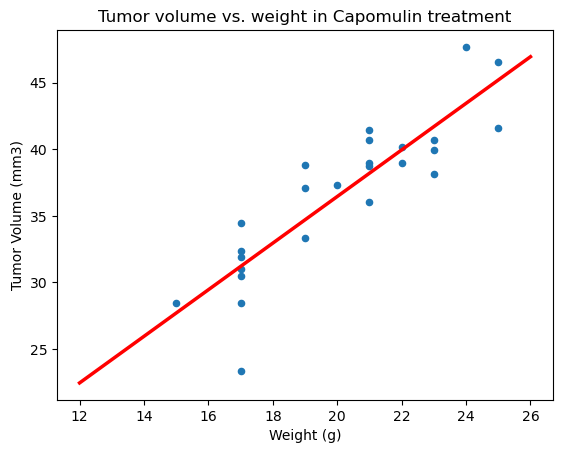

In [149]:
#for mouse weight and average tumor volume for the Capomulin regimen
# slope=1.75
# yintercept = 1.45

f = lambda x: 1.75*x + 1.45
x = np.array([12,26])
capomulin.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)', legend=False,ylabel = ('Tumor Volume (mm3)'),xlabel = ('Weight (g)'),title = ('Tumor volume vs. weight in Capomulin treatment'))
plt.plot(x,f(x),lw=2.5, c="red")